In [1]:
#### 4) Feature selection

In [2]:
# import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#### Import Datasets (5-Folds 80 % training & 20 % testing datasets)

In [3]:
# import the training and test set feature count matrices

fs="\t"
path="/Users/Hp/Desktop/2000_cohort_datasets_analysis/"

# assign dataset names
list_of_names = ['feature_count_fold_1_train','feature_count_fold_1_test', 
                 'feature_count_fold_2_train','feature_count_fold_2_test', 
                'feature_count_fold_3_train','feature_count_fold_3_test', 'feature_count_fold_4_train',
                 'feature_count_fold_4_test', 'feature_count_fold_5_train','feature_count_fold_5_test']
 
# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(len(list_of_names)):
    df = pd.read_csv(path+list_of_names[i]+".csv", index_col='sample_ID')
    dataframes_list.append(df)

#### Define training and testing sets

In [4]:
# define train and testing list 
train_list = [dataframes_list[0], dataframes_list[2], dataframes_list[4], 
                     dataframes_list[6], dataframes_list[8]]

test_list = [dataframes_list[1], dataframes_list[3], dataframes_list[5], 
                    dataframes_list[7], dataframes_list[9]]

#### Feature selection: Removal of Multi-collinearity

In [5]:
# Define the target variable 
target = 'grouping'

In [6]:
#train_list[0].head()

#### Feature selection: Removal of Multi-collinearity

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


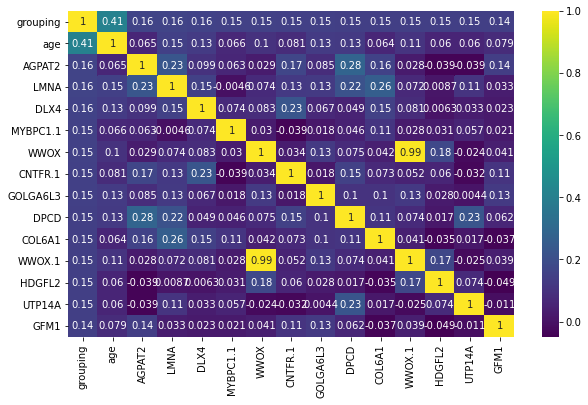

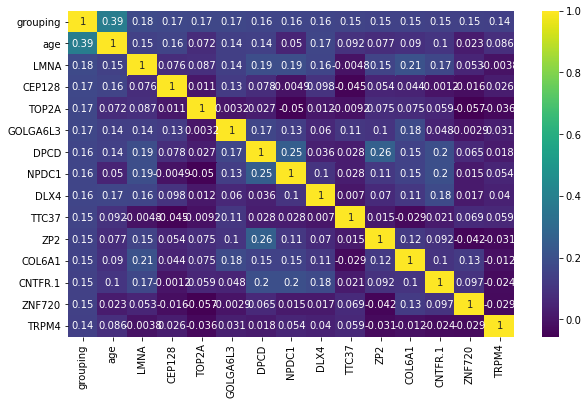

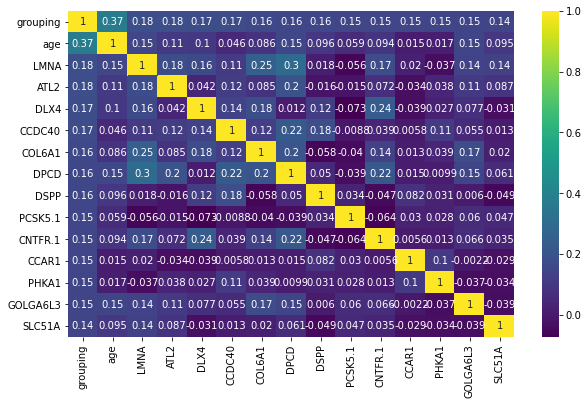

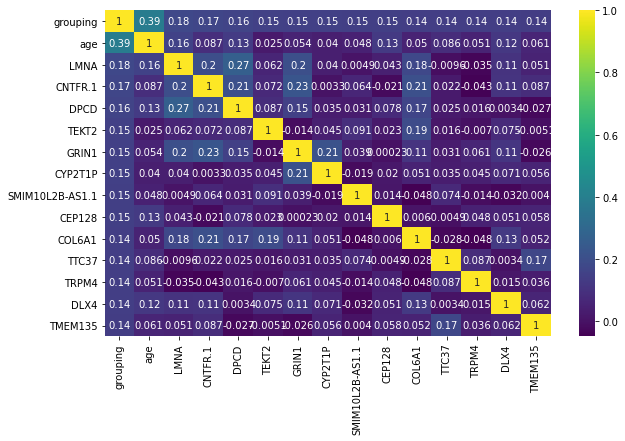

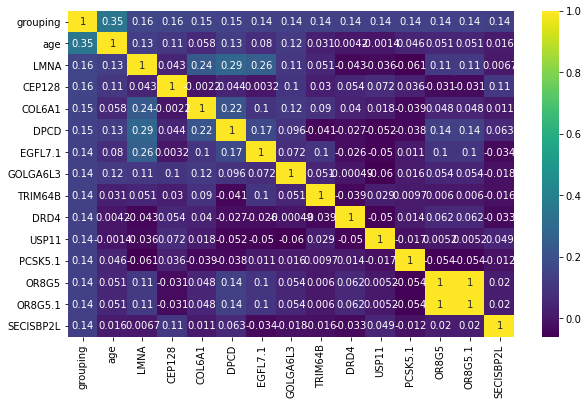

In [7]:
fold_no = 0
for df in train_list:
    # using correlation plot to check for multi-collinearity
    k = 15 #Number of variable for heatmap 
    cols = df.corr().nlargest(k, target)[target].index 
    cm = df[cols].corr()  
    fold_no += 1
    plt.figure(figsize = (10, 6))
    sns.heatmap(cm, annot = True, cmap = 'viridis')
    print('Fold',str(fold_no))

#### Dealing with Multi-collinearity

In [8]:
df1 = train_list[0] # trainset fold 1

df2 = test_list[0]  # testset fold 1 

df3 = train_list[1] # trainset fold 2

df4 = test_list[1]  # testset fold 2

df5 = train_list[2] # trainset fold 3

df6 = test_list[2]  # testset fold 3

df7 = train_list[3] # trainset fold 4

df8 = test_list[3]  # testset fold 4

df9 = train_list[4] # trainset fold 5

df10 = test_list[4]  # testset fold 5 

#1) Identify Highly Correlated Features

# Create correlation matrix
corr_matrix = df9.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80) or any(upper[column] < -(0.80))]

In [9]:
# Drop features in trainset 
df_9 = df9.drop(df9[to_drop], axis=1)
# Drop features in test set
df_10 = df10.drop(df10[to_drop], axis=1)
#save train and test sample set as CSV file 
df_9.to_csv(path+ "feature_count_fold_5_2000_train_grade543vs0_clean+multi_col.csv", index = True)

df_10.to_csv(path+ "feature_count_fold_5_2000_test_grade543vs0_clean+multi_col.csv", index = True)